In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time, os

from utils import ELFData

## Process data

In [2]:
savedir = 'data/processed/'
if not os.path.exists(savedir):
    os.mkdir(savedir)

### Labeled data

In [3]:
# Load labeled data
labeled = ELFData()
labeled.load_data(dirname='data/labeled', structure=True, label=True, additional=True)
labeled.data.iloc[:1]

Parse additional: 100%|██████████| 97/97 [00:00<00:00, 21940.76it/s]            


,formula,structure,label,r_src,r_dst,e_src,e_dst,g_src,g_dst,elf,e_diff,edge_src,edge_dst,l,r_diff,g_diff
0,Al2N2,"(Atom('Al', [1.564295564294, -0.90315018239500...",covalent,"[1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.2...","[0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.6...","[1.61, 1.61, 1.61, 1.61, 1.61, 1.61, 1.61, 1.6...","[3.04, 3.04, 3.04, 3.04, 3.04, 3.04, 3.04, 3.0...","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...","[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 1...","[[0.001232828834182255, 0.001087356613359765, ...","[1.43, 1.43, 1.43, 1.43, 1.43, 1.43, 1.43, 1.4...","[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, ...","[4, 6, 7, 5, 6, 7, 4, 5, 6, 4, 5, 7, 0, 2, 3, ...","[1.913597077829988, 1.90173702822746, 1.901726...","[0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."


In [4]:
# Get elements
labeled.get_species()

Get species dst: 100%|██████████| 97/97 [00:00<00:00, 7054.14it/s]              


In [5]:
# Tag mixed
labeled.tag_mixed()

100%|██████████| 97/97 [00:05<00:00, 16.84it/s]                                 


In [6]:
# Save
labeled.expand_data()
labeled.data.to_csv(savedir + 'labeled.csv', index=False)

### Unlabeled data

In [18]:
# Load unlabeled data
unlabeled = ELFData()
unlabeled.load_data(dirname='data/unlabeled', structure=True, additional=True)
unlabeled.data.iloc[:1]

Parse additional: 100%|██████████| 2355/2355 [00:00<00:00, 5790.14it/s]         


,formula,structure,r_src,r_dst,e_src,e_dst,g_src,g_dst,elf,e_diff,edge_src,edge_dst,l,r_diff,g_diff
0,100,"(Atom('K', [8.0834955, 8.0834955, 8.0834955], ...","[2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.8...","[3.16, 3.16, 3.16, 3.16, 3.16, 3.16, 3.16, 3.1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 13, 13, 1...","[17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 1...","[[0.0015327815625000077, 0.002364966985433359,...","[2.3400000000000003, 2.3400000000000003, 2.340...","[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, ...","[4, 5, 6, 7, 8, 9, 4, 5, 6, 7, 8, 9, 4, 5, 6, ...","[3.8124218166778574, 3.8124218166778574, 3.812...","[1.2000000000000002, 1.2000000000000002, 1.200...","[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1..."


In [19]:
# Get elements
unlabeled.get_species()

Get species dst: 100%|██████████| 2355/2355 [00:02<00:00, 865.65it/s]           


In [20]:
# Tag mixed
unlabeled.tag_mixed()

100%|██████████| 2355/2355 [07:13<00:00,  5.44it/s]                             


In [21]:
# Save
unlabeled.expand_data()
unlabeled.data.to_csv(savedir + 'unlabeled.csv', index=False)

## Analyze examples

### Plot mixed profiles

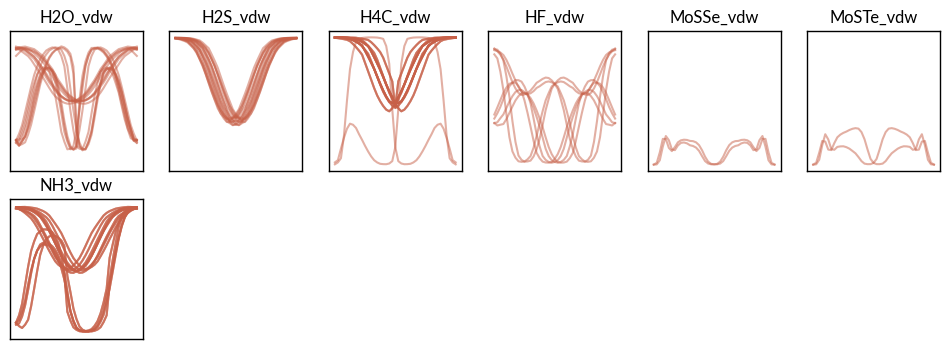

In [11]:
samples = labeled.data[labeled.data['mixed']==True]
ids = np.unique(samples['id'])
n = len(ids)

cols = 6
rows = n//cols + (n%cols > 0)
fig, ax = plt.subplots(rows, cols, figsize=(12,2*rows), sharex=True, sharey=True)
ax = ax.ravel()

for i, idx in enumerate(ids):
    for j, entry in enumerate(samples.loc[samples['id']==idx].itertuples()):
        ax[i].plot(entry.elf, color=labeled.dmap(labeled.norm(labeled.bond_to_float([entry.label]))), alpha=0.5)
    ax[i].set_title(entry.formula, fontsize=12)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    
for j in range(i+1,len(ax)):
    ax[j].remove()

### Visualize mixed geometries

In [17]:
from ase.io import read as read_ase
from ase.neighborlist import neighbor_list

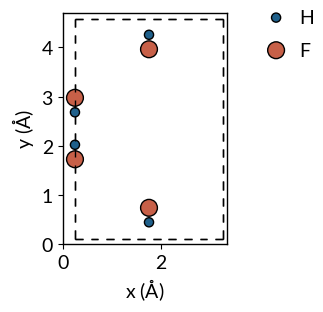

In [30]:
# Select example
idx = 39
columns = ['formula', 'edge_src', 'edge_dst', 'specie_src', 'specie_dst', 'l', 'elf']
sample = labeled.data.loc[labeled.data['id']==idx, columns].sort_values(by='l').reset_index(drop=True)
struct = read_ase('data/labeled/' + sample.iloc[0].formula + '/POSCAR')
labeled.plot_structure(struct, rotation=('0x,0y,0z'));

In [31]:
# Get cutoff radii
cutoffs = {(i,j):np.ceil(100*np.sqrt(2)*k)/100. for (i,j,k) in
           zip(sample['specie_src'], sample['specie_dst'], sample['l'])}
for k in cutoffs.keys():
    try: cutoffs[(k[1],k[0])]
    except: pass
    else: cutoffs[(k[0],k[1])] = max(cutoffs[(k[0],k[1])], cutoffs[(k[1],k[0])])
print(cutoffs)

{('H', 'F'): 2.8, ('F', 'H'): 2.8, ('F', 'F'): 3.81, ('H', 'H'): 3.81}


In [32]:
# Get neighbor lists
edge_src, edge_dst, edge_vec = neighbor_list("ijD", struct, cutoffs)

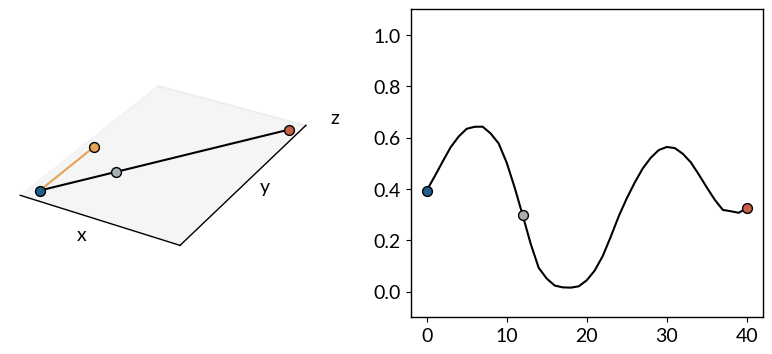

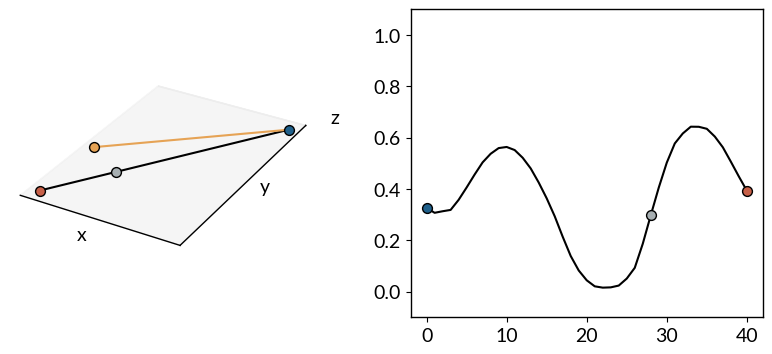

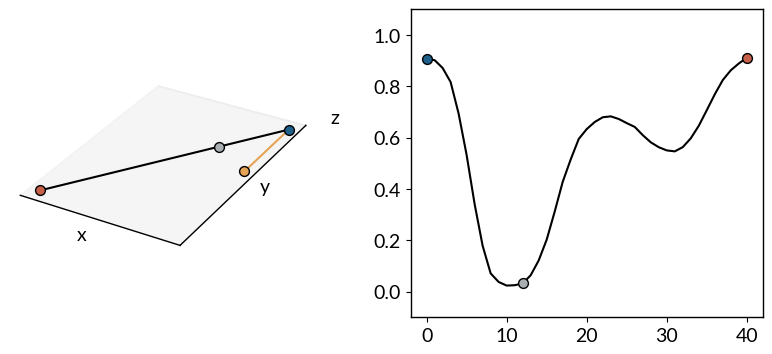

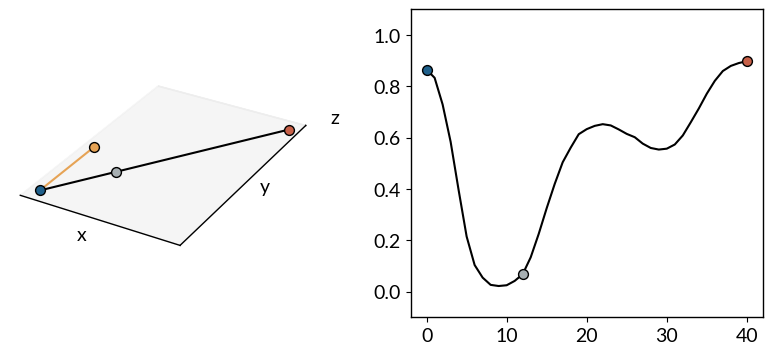

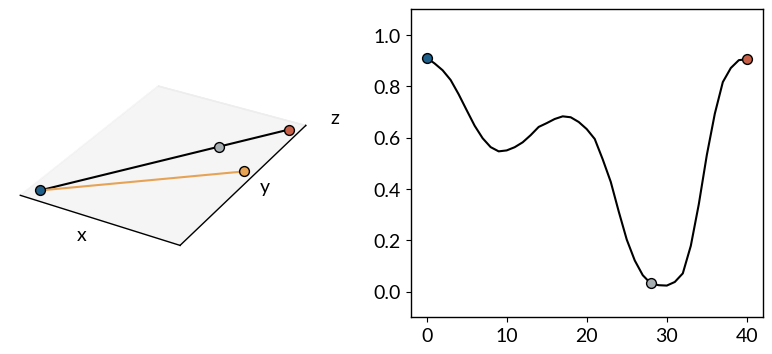

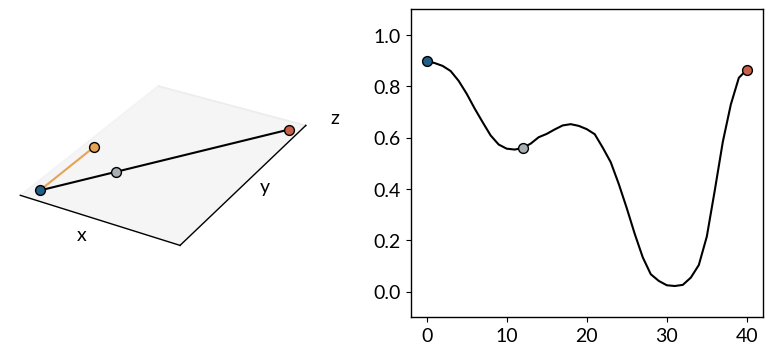

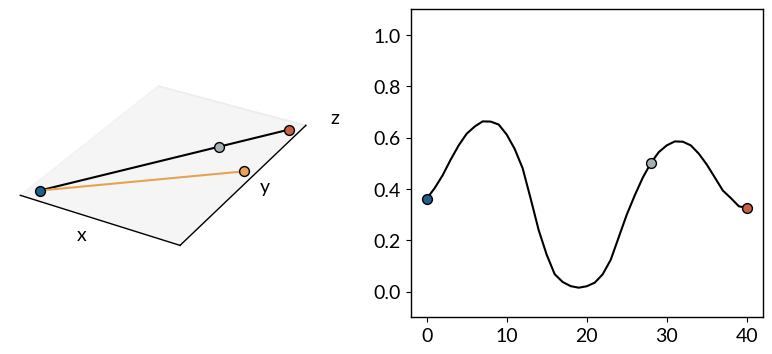

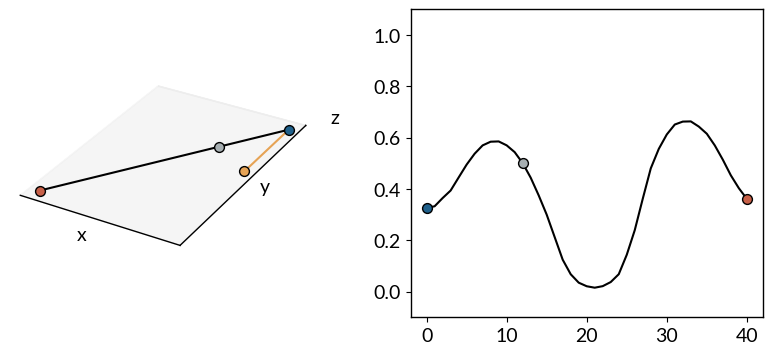

In [35]:
# Identify and plot mixed bonds
for i, entry in enumerate(sample.itertuples()):
    for j, v in enumerate(edge_vec[(edge_src==entry.edge_src) & (edge_dst != entry.edge_dst)]):
        u = struct.get_distance(entry.edge_src, entry.edge_dst, mic=True, vector=True)
        lam = labeled.get_projection(u, v)
        if (lam > 0) & (lam < 1):
            l = np.linalg.norm(u)
            d = np.linalg.norm(v - lam*u)
            if (d < lam*l) & (d < (1 - lam)*l):
                fig = plt.figure(figsize=(10,4))
                ax = fig.add_subplot(121, projection='3d')
                ax.plot(*np.stack([struct.positions[entry.edge_src],
                                   struct.positions[entry.edge_src] + u]).T, color='black')
                ax.plot(*np.stack([struct.positions[entry.edge_src],
                                   struct.positions[entry.edge_src] + v]).T, color=labeled.dmap(labeled.norm(2)))
                ax.scatter(*struct.positions[entry.edge_src], s=50, ec='black', fc=labeled.dmap(labeled.norm(0)))
                ax.scatter(*struct.positions[entry.edge_src] + u, s=50, ec='black', fc=labeled.dmap(labeled.norm(3)))
                ax.scatter(*struct.positions[entry.edge_src] + v, s=50, ec='black', fc=labeled.dmap(labeled.norm(2)))
                ax.scatter(*struct.positions[entry.edge_src] + lam*u, s=50, ec='black',
                           fc=labeled.dmap(labeled.norm(1)))
                ax.set_aspect('equal')
                ax.set_xlabel('x', labelpad=-8)
                ax.set_ylabel('y', labelpad=-8)
                ax.set_zlabel('z', labelpad=-8)
                ax.view_init(elev=30, azim=-60)
                ax.set_xticks([])
                ax.set_yticks([])
                ax.set_zticks([])
                
                ax = fig.add_subplot(122)
                ax.plot(entry.elf, color='black')
                ax.scatter(0, entry.elf[0], s=50, ec='black', fc=labeled.dmap(labeled.norm(0)), zorder=2)
                ax.scatter(len(entry.elf)-1, entry.elf[-1], s=50,
                           ec='black', fc=labeled.dmap(labeled.norm(3)), zorder=2)
                ax.scatter(int(lam*len(entry.elf)), entry.elf[int(lam*len(entry.elf))], s=50,
                           ec='black', fc=labeled.dmap(labeled.norm(1)), zorder=2)
                ax.set_ylim([-0.1, 1.1])
                edge_mix = edge_dst[(edge_src==entry.edge_src) & (edge_dst != entry.edge_dst)][j]